**Importing required libraries**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from google.colab.patches import cv2_imshow

**Loading the Dataset**

In [2]:
# Function to load CIFAR-10 data
def load_cifar10_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data

In [3]:
# Loading the dataset
file_path = '/content/data_batch_1'
batch_data = load_cifar10_data(file_path)
data = batch_data[b'data']
labels = batch_data[b'labels']

# Selecting 10 images (all from data_batch_1)
selected_images = []
selected_labels = []

#Selecting images from each class so that each class is represented
for i in range(len(labels)):
    if labels[i] not in selected_labels:
        selected_labels.append(labels[i])
        selected_images.append(data[i])

**Hough Transform - Line Detection**

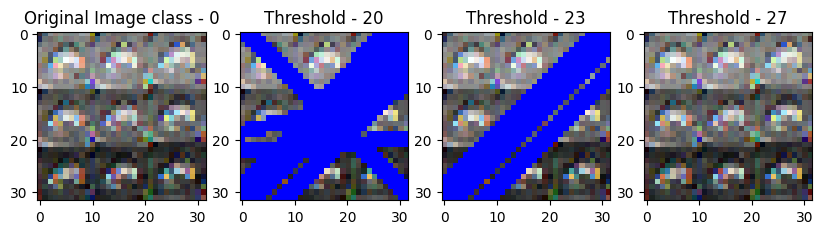

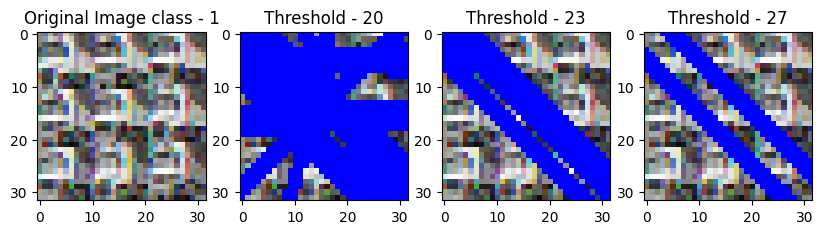

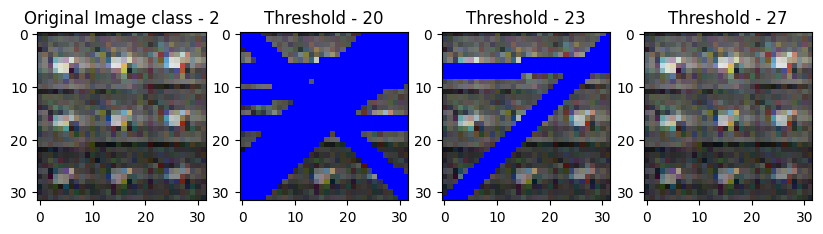

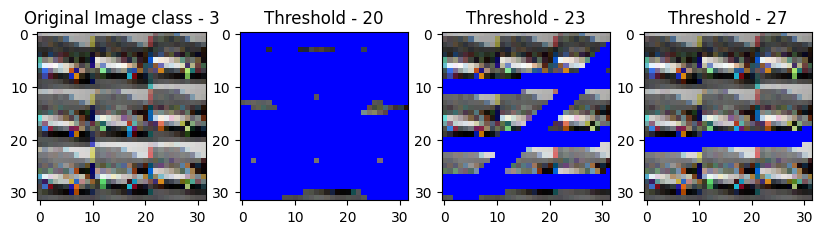

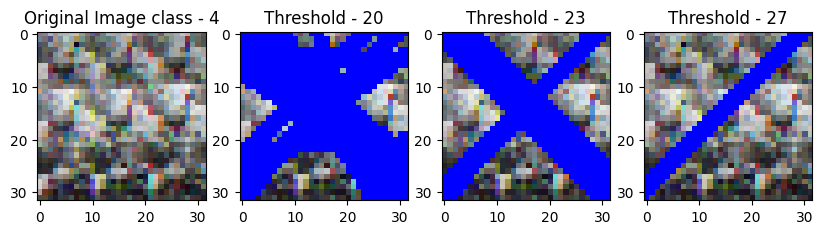

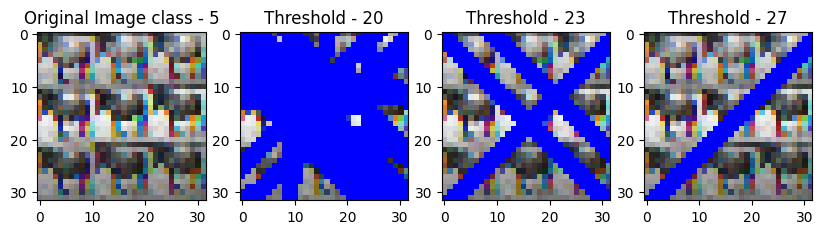

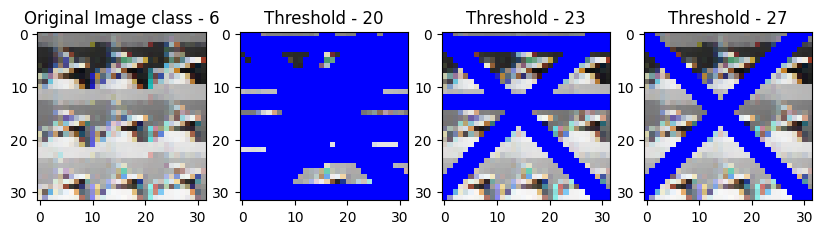

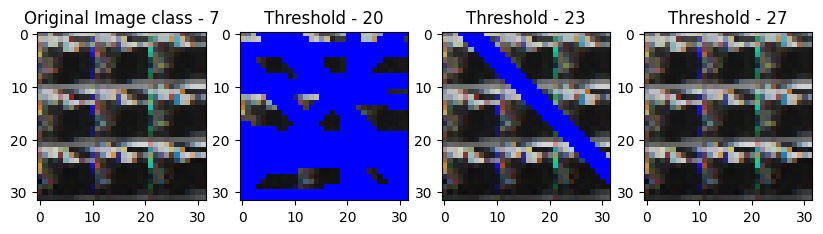

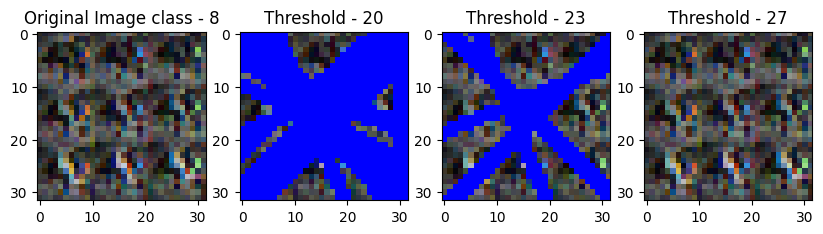

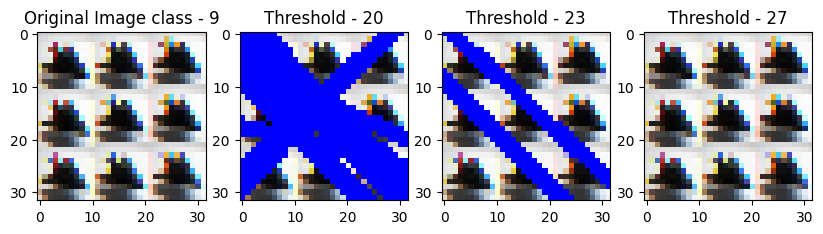

In [4]:
# Function to apply Hough Line Detection
def apply_hough_line_transform(i, image, thresholds):
    # Loading and reshaping the image
    image = image.reshape((32, 32, 3))

    # Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Applying Canny edge detection
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    # Creating subplots
    num_thresholds = len(thresholds)
    fig, axs = plt.subplots(1, num_thresholds + 1, figsize=(10, 5))

    # Displaying original image in the first subplot so taking 0th index
    axs[0].imshow(image)
    axs[0].set_title(f'Original Image class - {i}')

    # Applying Hough Line Transform for specified thresholds
    for i, th in enumerate(thresholds, start=1):
        # Applying the Hough Line Transform function
        lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=th)
        line_img = image.copy()

        if lines is not None:
            for rho, theta in lines[:, 0]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

        #Displaying images in subsequent subplots on which Hough Line Transform has been applied for each image class
        axs[i].imshow(line_img)
        axs[i].set_title(f'Threshold - {th}')

    plt.show()


for i, image in enumerate(selected_images):
    # Setting the threshold values
    threshold_values = [20, 23, 27]
    #Calling the function
    apply_hough_line_transform(i, image, threshold_values)


**Hough Transform - Circle Detection**

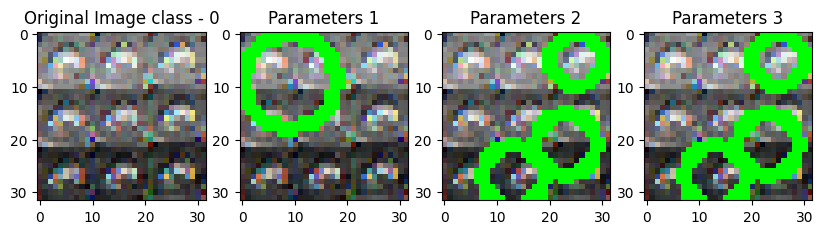

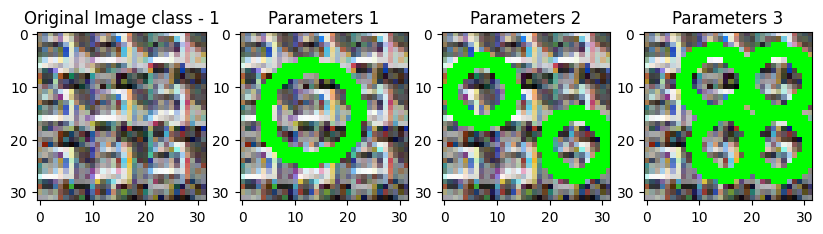

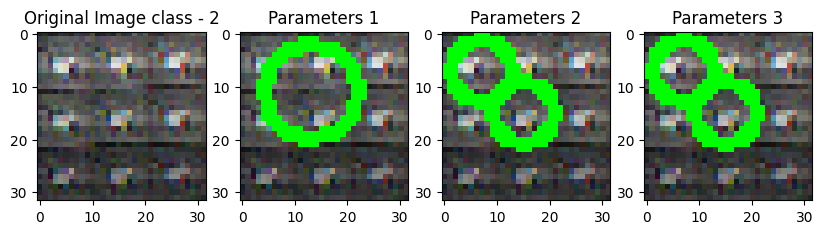

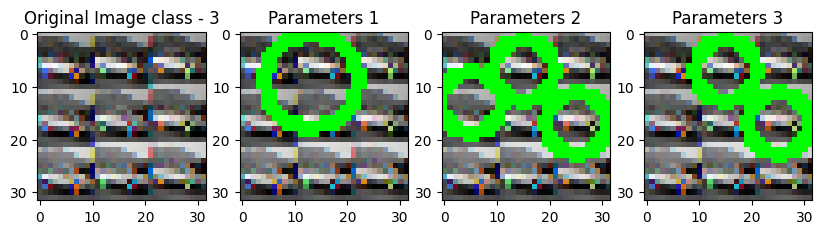

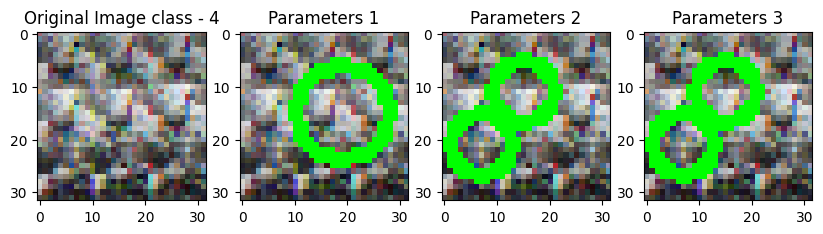

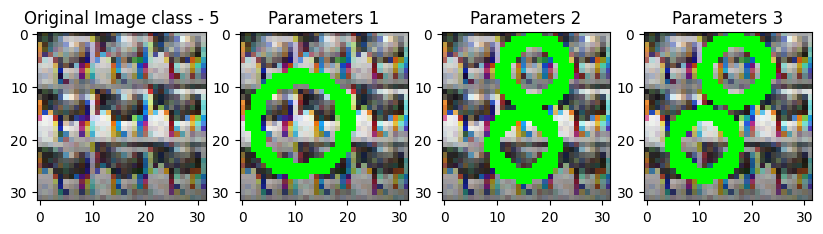

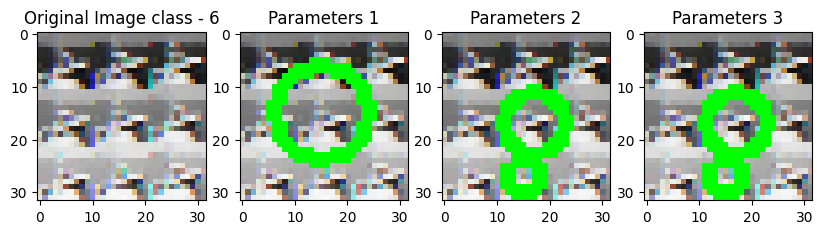

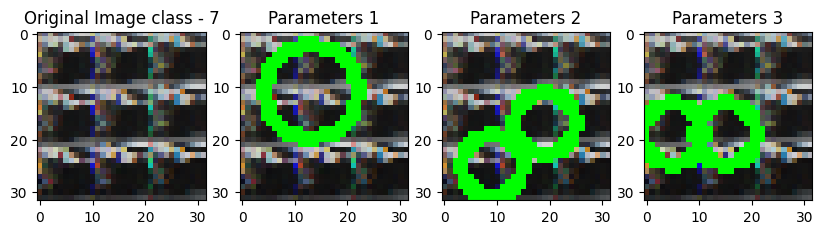

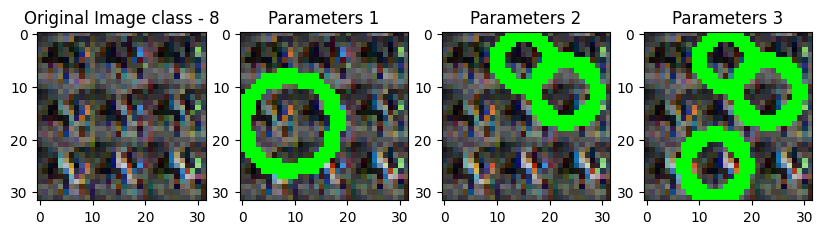

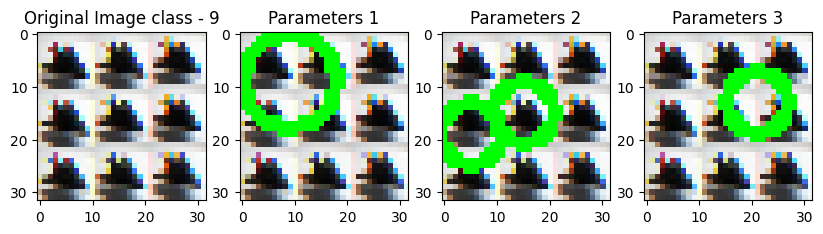

In [19]:
# Function to apply Hough Circle Detection
def apply_hough_circle_transform(i, image, circle_transform_params_list):
    # Loading and reshaping the image
    image = image.reshape((32, 32, 3))

    # Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    # Creating subplots
    num_thresholds = len(circle_transform_params_list)
    fig, axs = plt.subplots(1, num_thresholds + 1, figsize=(10, 5))

    # Displaying original image in the first subplot so taking 0th index
    axs[0].imshow(image)
    axs[0].set_title(f'Original Image class - {i}')

    for j, params in enumerate(circle_transform_params_list, start=1):
        # Applying Hough Circle Transform with dynamic parameters
        circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, **params)
        circle_img = image.copy()

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for k in circles[0, :]:
                cv2.circle(circle_img, (k[0], k[1]), k[2], (0, 255, 0), 2)

        axs[j].imshow(circle_img)
        axs[j].set_title(f'Parameters {j}')
    plt.show()

# Setting dynamic parameters for Hough Circle Transform
circle_transform_params_list = [
    {'dp': 2, 'minDist': 20, 'param1': 50, 'param2': 20, 'minRadius': 2, 'maxRadius': 10},
    {'dp': 2, 'minDist': 10, 'param1': 50, 'param2': 20, 'minRadius': 2, 'maxRadius': 7},
    {'dp': 2, 'minDist': 10, 'param1': 40, 'param2': 20, 'minRadius': 1, 'maxRadius': 7}
]

for i, image in enumerate(selected_images):
    # Calling the function
    apply_hough_circle_transform(i, image, circle_transform_params_list)


**Scale-Invariant Feature Transform Detector & Descriptor**

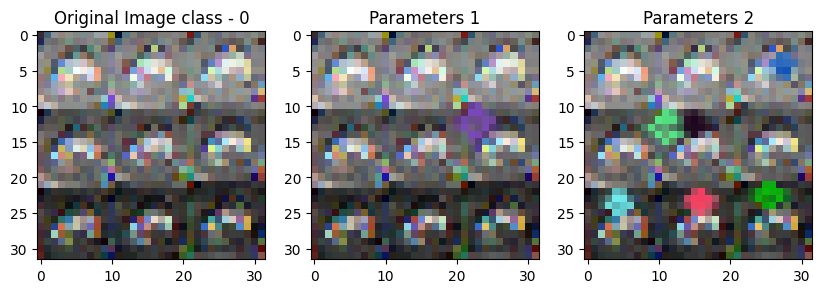

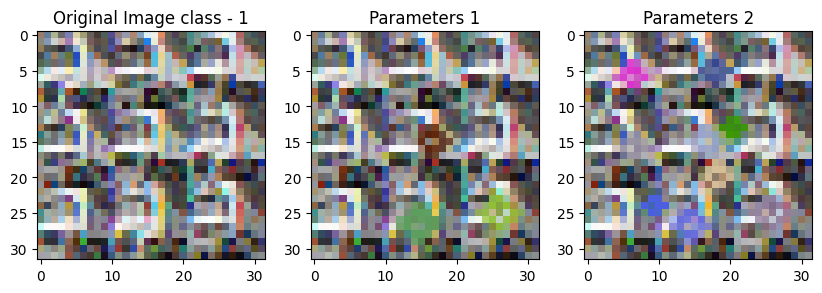

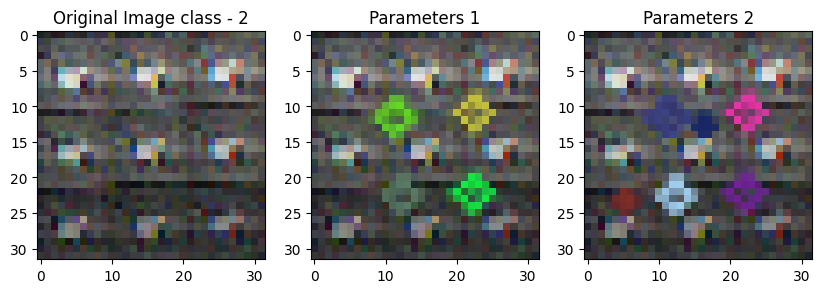

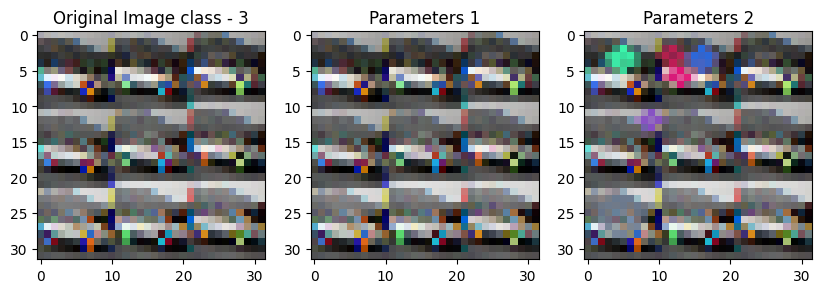

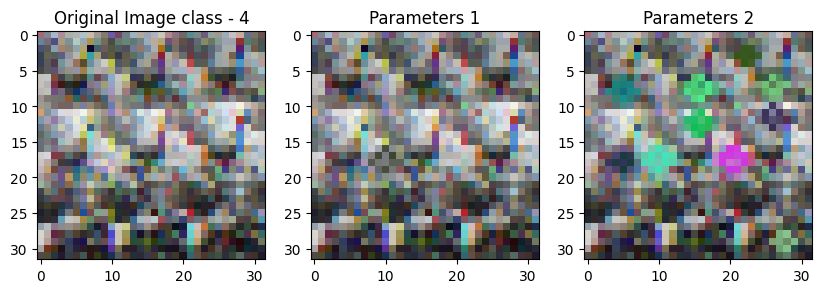

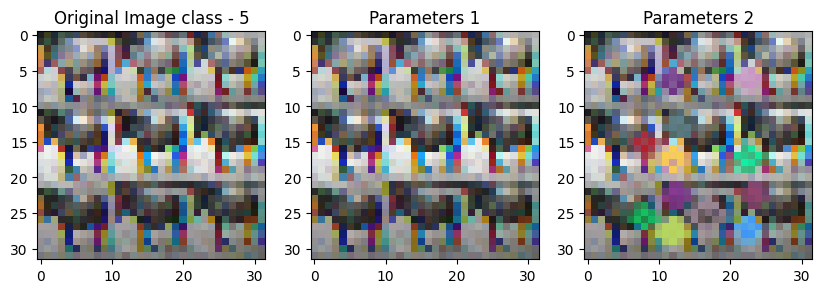

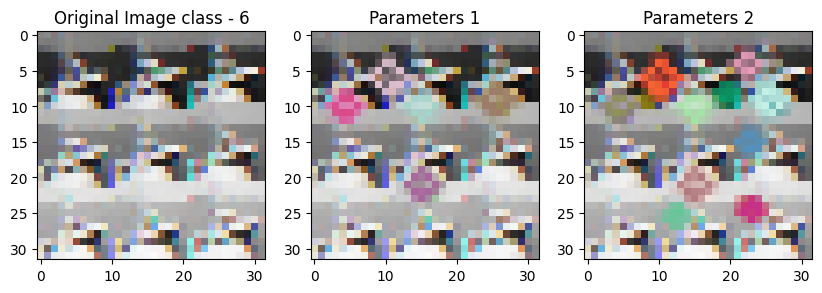

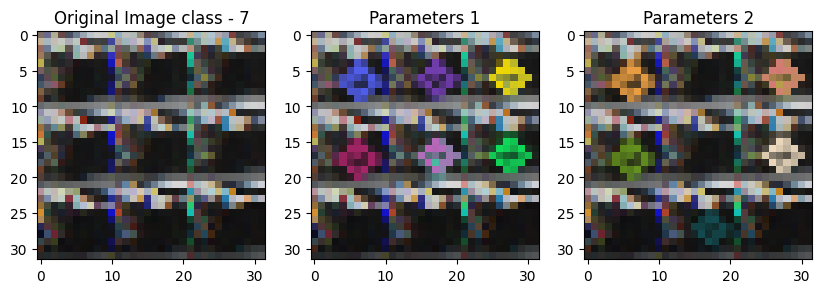

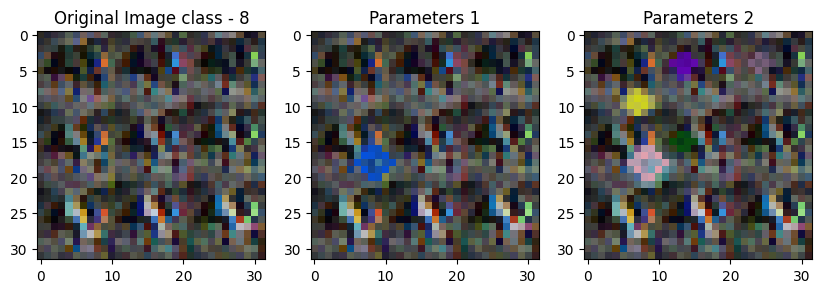

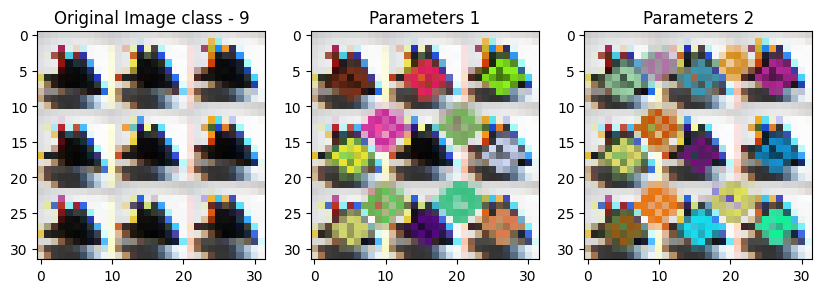

In [16]:
# Function to apply SIFT and plot keypoints
def sift_detector(i, image, sift_params_list):
    # Loading the image
    image = image.reshape((32, 32, 3))
    # Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Creating subplots
    num_thresholds = len(sift_params_list)
    fig, axs = plt.subplots(1, num_thresholds + 1, figsize=(10, 5))

    # Displaying original image in the first subplot so taking 0th index
    axs[0].imshow(image)
    axs[0].set_title(f'Original Image class - {i}')

    for j, sift_params in enumerate(sift_params_list, start = 1):
      # Initializing SIFT detector
      sift = cv2.SIFT_create(**sift_params)

      # Detecting number of keypoints and compute descriptors (descriptors is a numpy array of shape 128 x keypoints)
      keypoints, descriptors = sift.detectAndCompute(gray_image, None)

      # Plotting the keypoints on the original image
      img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

      axs[j].imshow(img_with_keypoints)
      axs[j].set_title(f'Parameters {j}')
    plt.show()

#Setting the SIFT parameters
sift_params_list = [
    {'sigma': 3, 'edgeThreshold': 50},
    {'sigma': 2, 'edgeThreshold': 10}
]
# Applying SIFT and plot keypoints for the 10 images
for i, image in enumerate(selected_images):
    # Applying SIFT detector on the image and calling the function
    sift_result = sift_detector(i, image, sift_params_list)
